### 🎯 Objective
### The primary objective of this project is to analyze how environmental and agricultural factors impact crop yields. By identifying trends, patterns, and correlations within the dataset, we aim to support agri-researchers and policymakers in making data-driven decisions for sustainable and optimized farming practices. This EDA lays the foundation for future predictive modeling on crop yield forecasting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import missingno as msno

#  🗂️📥 Import Dataset

In [2]:
df = pd.read_csv("karnataka.csv")
df

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeilds,Humidity,Crops,price,Season
0,2004,Mangalore,1279,2903.1,27,Alluvial,Drip,2570,57.0,Coconut,200000.0,Kharif
1,2004,Mangalore,13283,2903.1,27,Alluvial,Drip,27170,57.5,Coconut,4847.0,Kharif
2,2004,Mangalore,52119,2903.1,27,Alluvial,Drip,114744,57.0,Coconut,51239.0,Kharif
3,2004,Mangalore,725,2996.6,27,Alluvial,Drip,1402,55.0,Coconut,216396.0,Kharif
4,2004,Mangalore,12885,2996.6,27,Alluvial,Drip,23456,56.0,Coconut,2644.0,Kharif
...,...,...,...,...,...,...,...,...,...,...,...,...
3153,2013,Davangere,46990,3296,27,NaN,Drip,107809,53.5,Coconut,51239.0,Rabi
3154,2014,Davangere,103,3296,27,NaN,Drip,1132,52.5,Coconut,216396.0,Rabi
3155,2015,Davangere,8239,3550,27,NaN,Drip,23960,56.0,Coconut,2644.0,Rabi
3156,2016,Davangere,44563,3550,27,NaN,Drip,126487,57.0,Coconut,44235.0,Rabi


In [3]:
df.rename(columns={'Soil type': 'Soil_type'}, inplace=True)

In [4]:
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['year', 'location', 'area', 'rainfall', 'temperature', 'soil_type',
       'irrigation', 'yeilds', 'humidity', 'crops', 'price', 'season'],
      dtype='object')

# I standardized all column names by removing leading and trailing spaces and converting them to lowercase to ensure consistency.

In [5]:
df.columns

Index(['year', 'location', 'area', 'rainfall', 'temperature', 'soil_type',
       'irrigation', 'yeilds', 'humidity', 'crops', 'price', 'season'],
      dtype='object')

In [6]:
df.shape

(3158, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         3158 non-null   int64  
 1   location     3158 non-null   object 
 2   area         3155 non-null   object 
 3   rainfall     3157 non-null   object 
 4   temperature  3157 non-null   object 
 5   soil_type    3100 non-null   object 
 6   irrigation   3156 non-null   object 
 7   yeilds       3158 non-null   object 
 8   humidity     3156 non-null   float64
 9   crops        3156 non-null   object 
 10  price        3157 non-null   float64
 11  season       3157 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 296.2+ KB


In [8]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
year,3158.0,NaN,NaN,NaN,2009.929702,5.100895,2004.0,2004.0,2010.0,2015.0,2019.0
location,3158,11,Hassan,798,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area,3155,157,4,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rainfall,3157,23,2903.1,306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,3157,107,27,672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
soil_type,3100,27,Alluvial,459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
irrigation,3156,3,Drip,1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yeilds,3158,163,187,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
humidity,3156.0,NaN,NaN,NaN,55.581274,2.47019,50.0,54.0,56.0,57.0,60.0
crops,3156,13,Coconut,1456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# After loading the dataset, we obtained an overview of the data, which contains 3,158 records and 12 features. Additionally, I used the describe() method to gain statistical insights into the numeric variables.

# 🖥️📑 View Records

In [9]:
df.head()

,year,location,area,rainfall,temperature,soil_type,irrigation,yeilds,humidity,crops,price,season
0,2004,Mangalore,1279,2903.1,27,Alluvial,Drip,2570,57.0,Coconut,200000.0,Kharif
1,2004,Mangalore,13283,2903.1,27,Alluvial,Drip,27170,57.5,Coconut,4847.0,Kharif
2,2004,Mangalore,52119,2903.1,27,Alluvial,Drip,114744,57.0,Coconut,51239.0,Kharif
3,2004,Mangalore,725,2996.6,27,Alluvial,Drip,1402,55.0,Coconut,216396.0,Kharif
4,2004,Mangalore,12885,2996.6,27,Alluvial,Drip,23456,56.0,Coconut,2644.0,Kharif


In [10]:
df.tail()

,year,location,area,rainfall,temperature,soil_type,irrigation,yeilds,humidity,crops,price,season
3153,2013,Davangere,46990,3296,27,NaN,Drip,107809,53.5,Coconut,51239.0,Rabi
3154,2014,Davangere,103,3296,27,NaN,Drip,1132,52.5,Coconut,216396.0,Rabi
3155,2015,Davangere,8239,3550,27,NaN,Drip,23960,56.0,Coconut,2644.0,Rabi
3156,2016,Davangere,44563,3550,27,NaN,Drip,126487,57.0,Coconut,44235.0,Rabi
3157,2017,Davangere,96,3550,27,NaN,Drip,804,57.5,Coconut,203317.0,Rabi


# I retrieved the first and last five records to better understand the data.

# 📋🔢 Determine Data Types

In [11]:
df.dtypes

year             int64
location        object
area            object
rainfall        object
temperature     object
soil_type       object
irrigation      object
yeilds          object
humidity       float64
crops           object
price          float64
season          object
dtype: object

In [12]:
for col in ['area', 'rainfall', 'temperature', 'yeilds']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dtypes

year             int64
location        object
area           float64
rainfall       float64
temperature    float64
soil_type       object
irrigation      object
yeilds         float64
humidity       float64
crops           object
price          float64
season          object
dtype: object

In [13]:
cat_var = df.select_dtypes(include = "object")
cat_var

,location,soil_type,irrigation,crops,season
0,Mangalore,Alluvial,Drip,Coconut,Kharif
1,Mangalore,Alluvial,Drip,Coconut,Kharif
2,Mangalore,Alluvial,Drip,Coconut,Kharif
3,Mangalore,Alluvial,Drip,Coconut,Kharif
4,Mangalore,Alluvial,Drip,Coconut,Kharif
...,...,...,...,...,...
3153,Davangere,NaN,Drip,Coconut,Rabi
3154,Davangere,NaN,Drip,Coconut,Rabi
3155,Davangere,NaN,Drip,Coconut,Rabi
3156,Davangere,NaN,Drip,Coconut,Rabi


In [14]:
num_var = df.select_dtypes(include = "number")
num_var

,year,area,rainfall,temperature,yeilds,humidity,price
0,2004,1279.0,2903.1,27.0,2570.0,57.0,200000.0
1,2004,13283.0,2903.1,27.0,27170.0,57.5,4847.0
2,2004,52119.0,2903.1,27.0,114744.0,57.0,51239.0
3,2004,725.0,2996.6,27.0,1402.0,55.0,216396.0
4,2004,12885.0,2996.6,27.0,23456.0,56.0,2644.0
...,...,...,...,...,...,...,...
3153,2013,46990.0,3296.0,27.0,107809.0,53.5,51239.0
3154,2014,103.0,3296.0,27.0,1132.0,52.5,216396.0
3155,2015,8239.0,3550.0,27.0,23960.0,56.0,2644.0
3156,2016,44563.0,3550.0,27.0,126487.0,57.0,44235.0


# In the dataset, some columns like Area, Rainfall, Temperature and Yields contain numbers and should be numeric. However, when I used the dtypes method, they were shown as objects, so I converted them to numeric.

# 📈🧐 Univariate Analysis

In [15]:
for i in df.columns:
    print(i, ':', '\n')
    print(df[i].value_counts(normalize=True)*100, '\n')  
    print('*' * 40) 

year : 

year
2004    28.942369
2017     7.029766
2016     6.839772
2015     6.079797
2013     5.889804
2014     5.889804
2018     5.889804
2012     4.559848
2005     4.179861
2011     4.179861
2006     3.989867
2007     3.989867
2008     3.989867
2009     3.989867
2010     3.989867
2019     0.569981
Name: proportion, dtype: float64 

****************************************
location : 

location
Hassan           25.269158
Gulbarga         15.959468
Mangalore        10.829639
Chikmangaluru    10.766308
Madikeri          7.599747
Kasaragodu        7.314756
Raichur           7.314756
Mysuru            7.029766
Kodagu            6.079797
Davangere         1.329956
Bangalore         0.506650
Name: proportion, dtype: float64 

****************************************
area : 

area
4.0      1.712112
177.0    1.648700
206.0    1.648700
15.0     1.141408
6.0      1.141408
           ...   
7.0      0.253646
68.0     0.253646
66.0     0.253646
55.0     0.253646
42.0     0.253646
Name: proportio

# To analyze the distribution of values in each column of the DataFrame, I used the value_counts() method. This provided a quick overview of the data distribution and helped with further preprocessing. 🚀

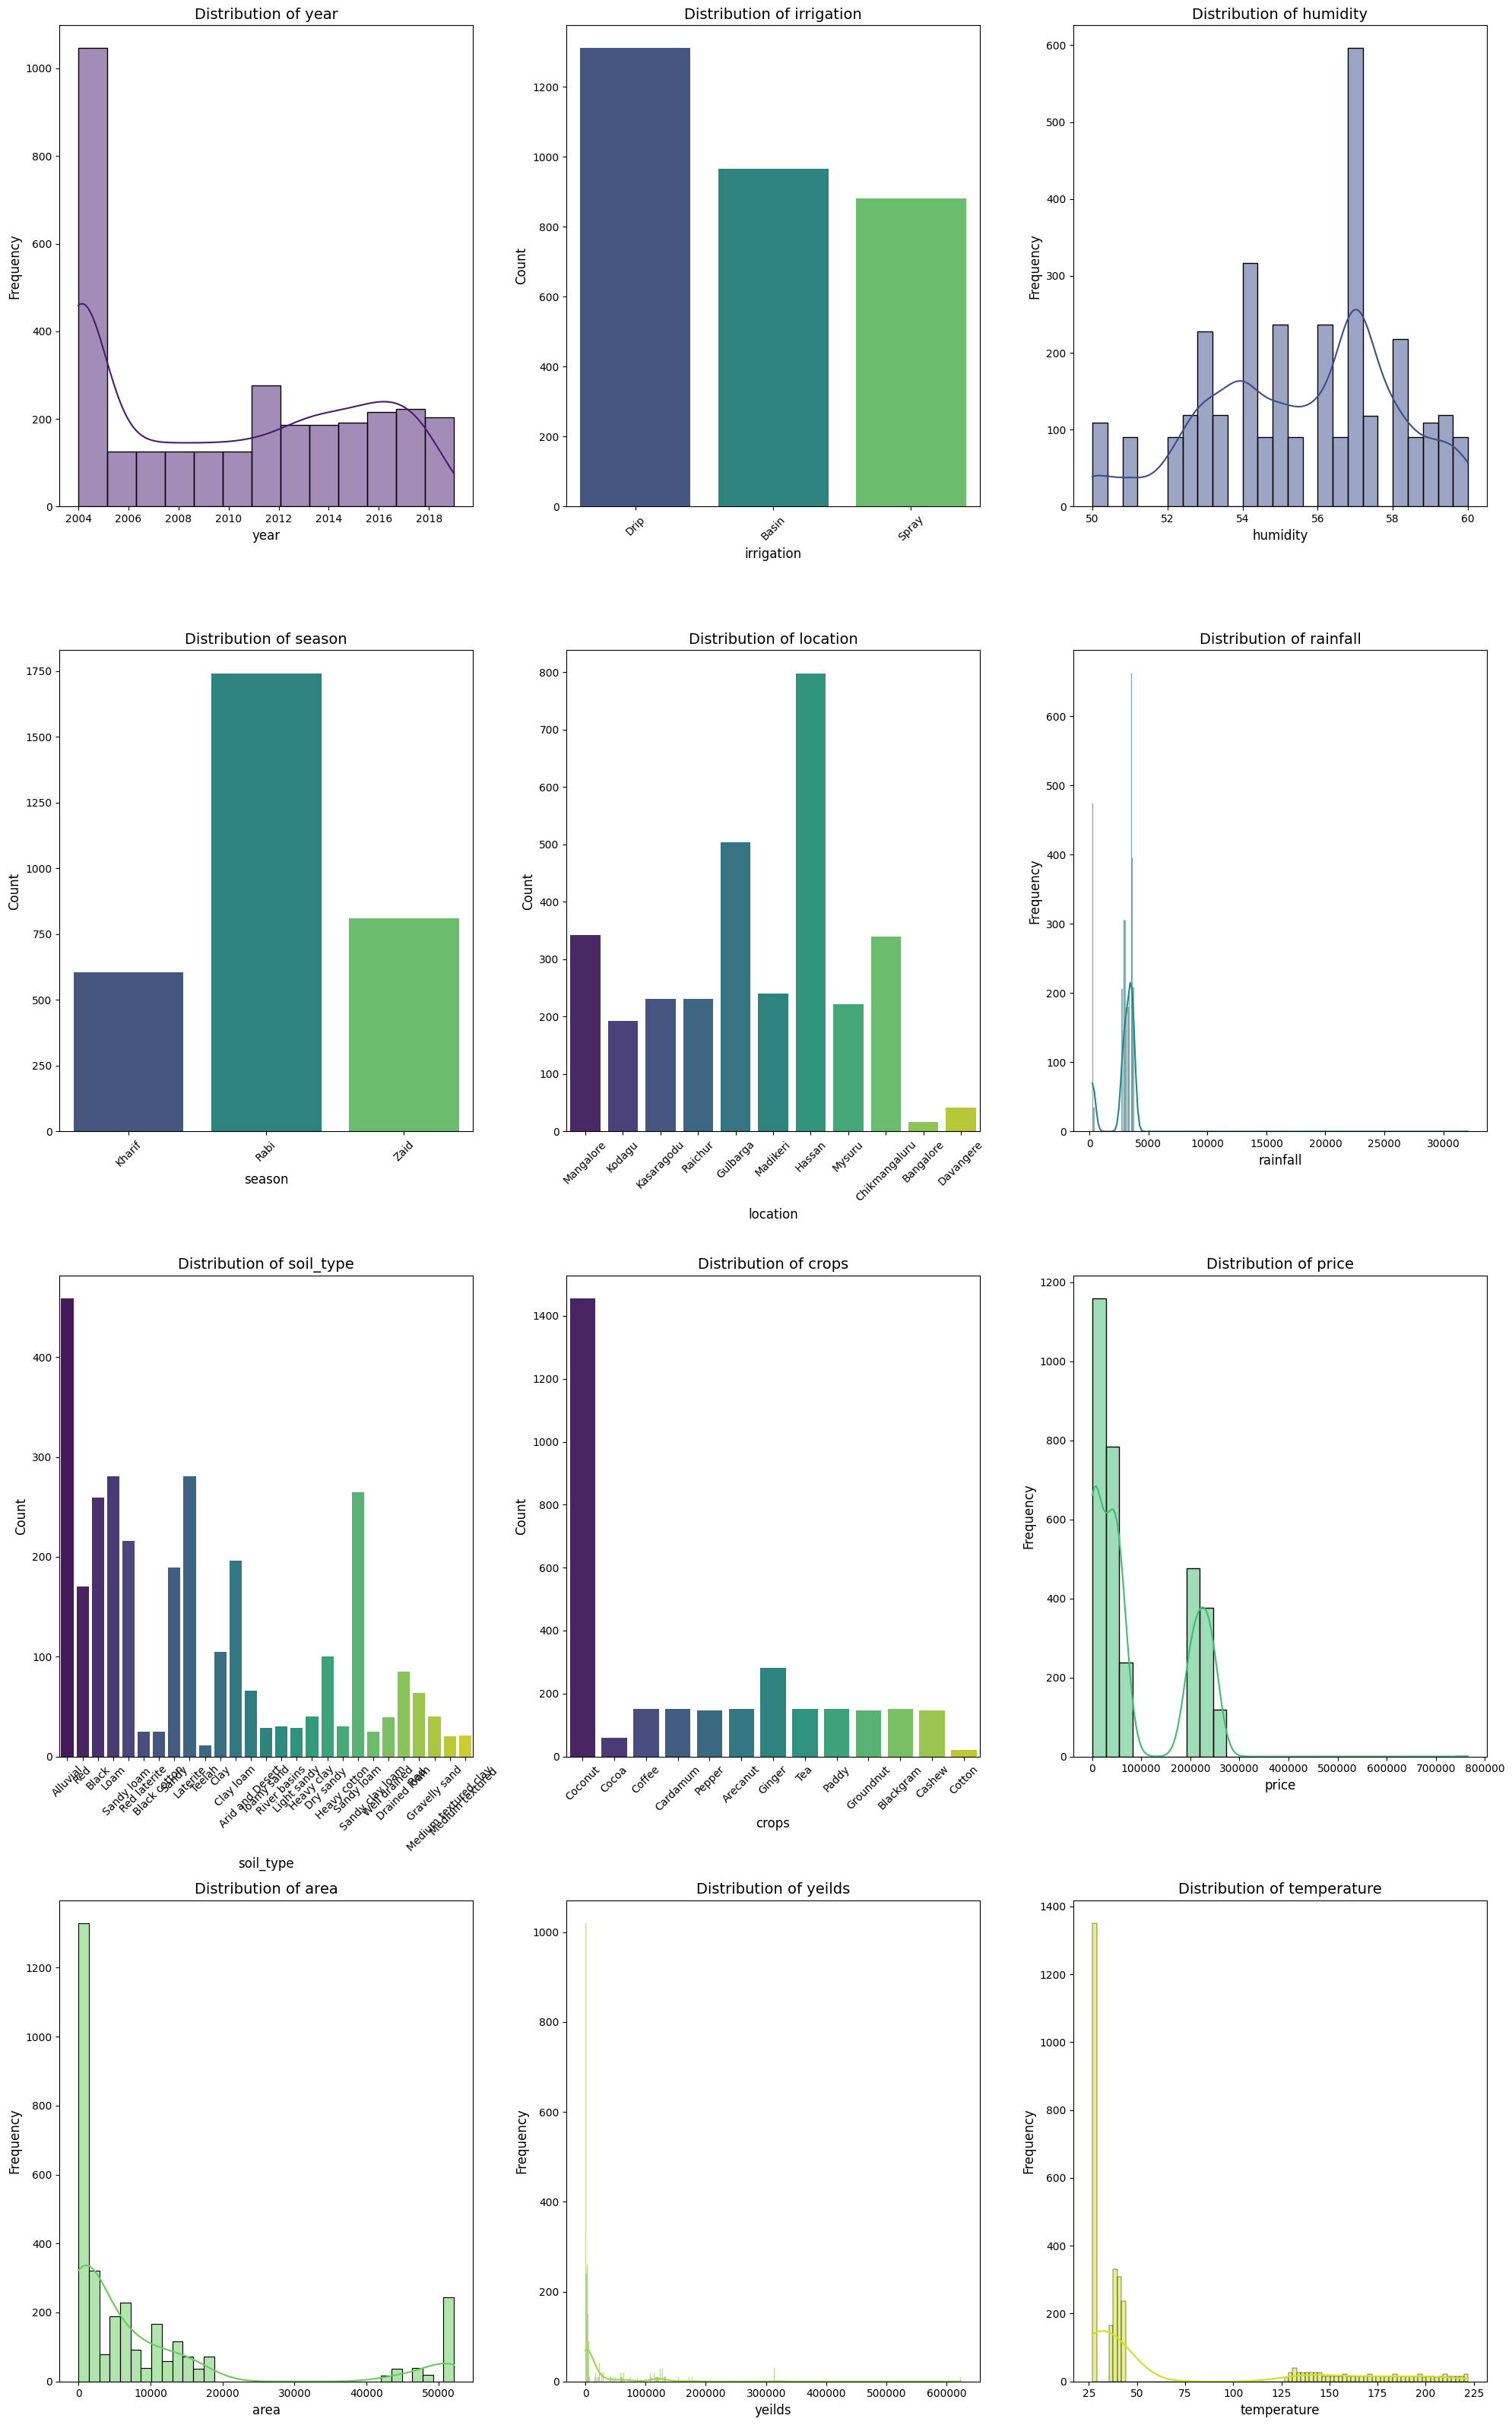

In [16]:
selected_columns = ['year', 'irrigation', 'humidity', 'season', 
                    'location', 'rainfall', 
                    'soil_type', 'crops', 'price', 'area', 'yeilds', 'temperature']

num_cols = len(selected_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  

fig, ax = plt.subplots(num_rows, 3, figsize=(20, 8 * num_rows))
axes = ax.flatten()

colors = sns.color_palette("viridis", num_cols)

for i, col in enumerate(selected_columns):
    if df[col].dtype == 'object':  
        sns.countplot(x=df[col], hue=df[col], ax=axes[i], palette="viridis", legend=False)
        axes[i].tick_params(axis='x', rotation=45)  
        axes[i].set_ylabel('Count', fontsize=12)
    else:  
        sns.histplot(df[col], kde=True, color=colors[i], ax=axes[i], legend=False)
        axes[i].set_ylabel('Frequency', fontsize=12)

    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)

plt.tight_layout()
plt.show()

# After conducting univariate analysis using visualizations and the value_counts() method, I identified the following:

# Categorical variables: Location, Soil type, Irrigation, Crops, and Season.

# Numerical variables: Year, Area, Rainfall, Temperature, Yeilds, Humidity, and Price.

# The target variable for this analysis is 'Yeilds'.

# Upon reviewing the categorical variables, I observed that some, such as Crops, have imbalanced classes. For the numerical variables, 'Yeilds' appears to have a skewed distribution. Moving forward, I will address these issues by transforming variables as needed and investigating potential correlations between features.

# 🔄📑 Duplicate Entries

In [17]:
df.duplicated().sum()

0

# The data has no duplicated records.

# 🔍❓ Detecting Missing Values

In [18]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
missing_values = df.isna().sum()

In [20]:
missing_percentage = (df.isna().sum() / len(df)) * 100

In [21]:
missing_data = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage (%)": missing_percentage
})

In [22]:
missing_data

,Missing Values,Percentage (%)
year,0,0.000000
location,0,0.000000
area,4,0.126662
rainfall,2,0.063331
temperature,2,0.063331
soil_type,58,1.836605
irrigation,2,0.063331
yeilds,1,0.031666
humidity,2,0.063331
crops,2,0.063331


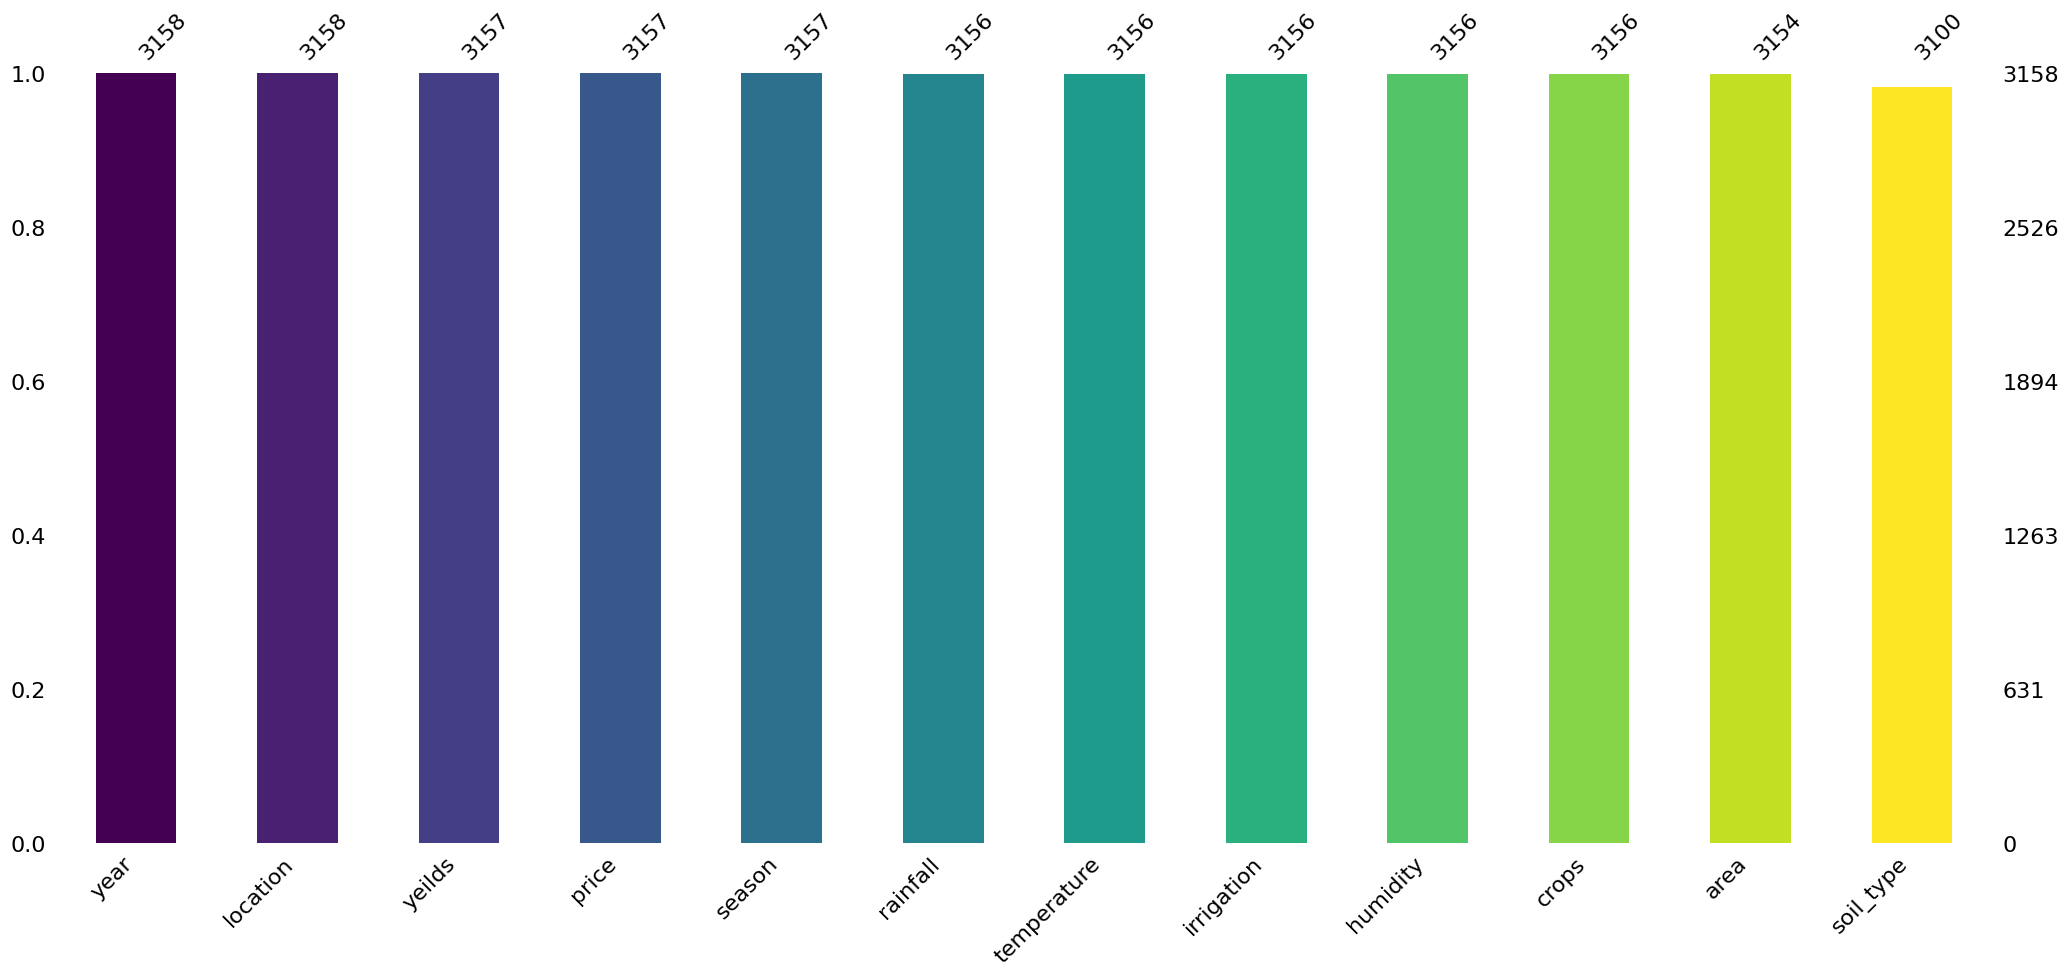

In [23]:
missing_values = df.isnull().sum().sort_values(ascending=True)
df_sorted = df[missing_values.index]

colors = plt.cm.viridis(np.linspace(0, 1, df_sorted.shape[1]))
msno.bar(df_sorted, color=colors)
plt.show()

# Imputing Missing Values

In [24]:
df = df.dropna(subset=['area', 'rainfall', 'temperature', 'soil_type', 'irrigation', 'yeilds', 'humidity', 'crops', 'price', 'season'])

In [25]:
print("\nMissing Values after dropping null values in soil type:")
df.isna().sum()


Missing Values after dropping null values in soil type:


year           0
location       0
area           0
rainfall       0
temperature    0
soil_type      0
irrigation     0
yeilds         0
humidity       0
crops          0
price          0
season         0
dtype: int64

In [26]:
df.shape

(3084, 12)

# Since the percentage of missing values for each column is less than 5%, I decided to remove the rows with null values. After removing the rows with null values, the dataset now contains 3,084 records and 12 columns. The data is now clean and does not have any missing values.

# 🚨📈 Detecting Outliers

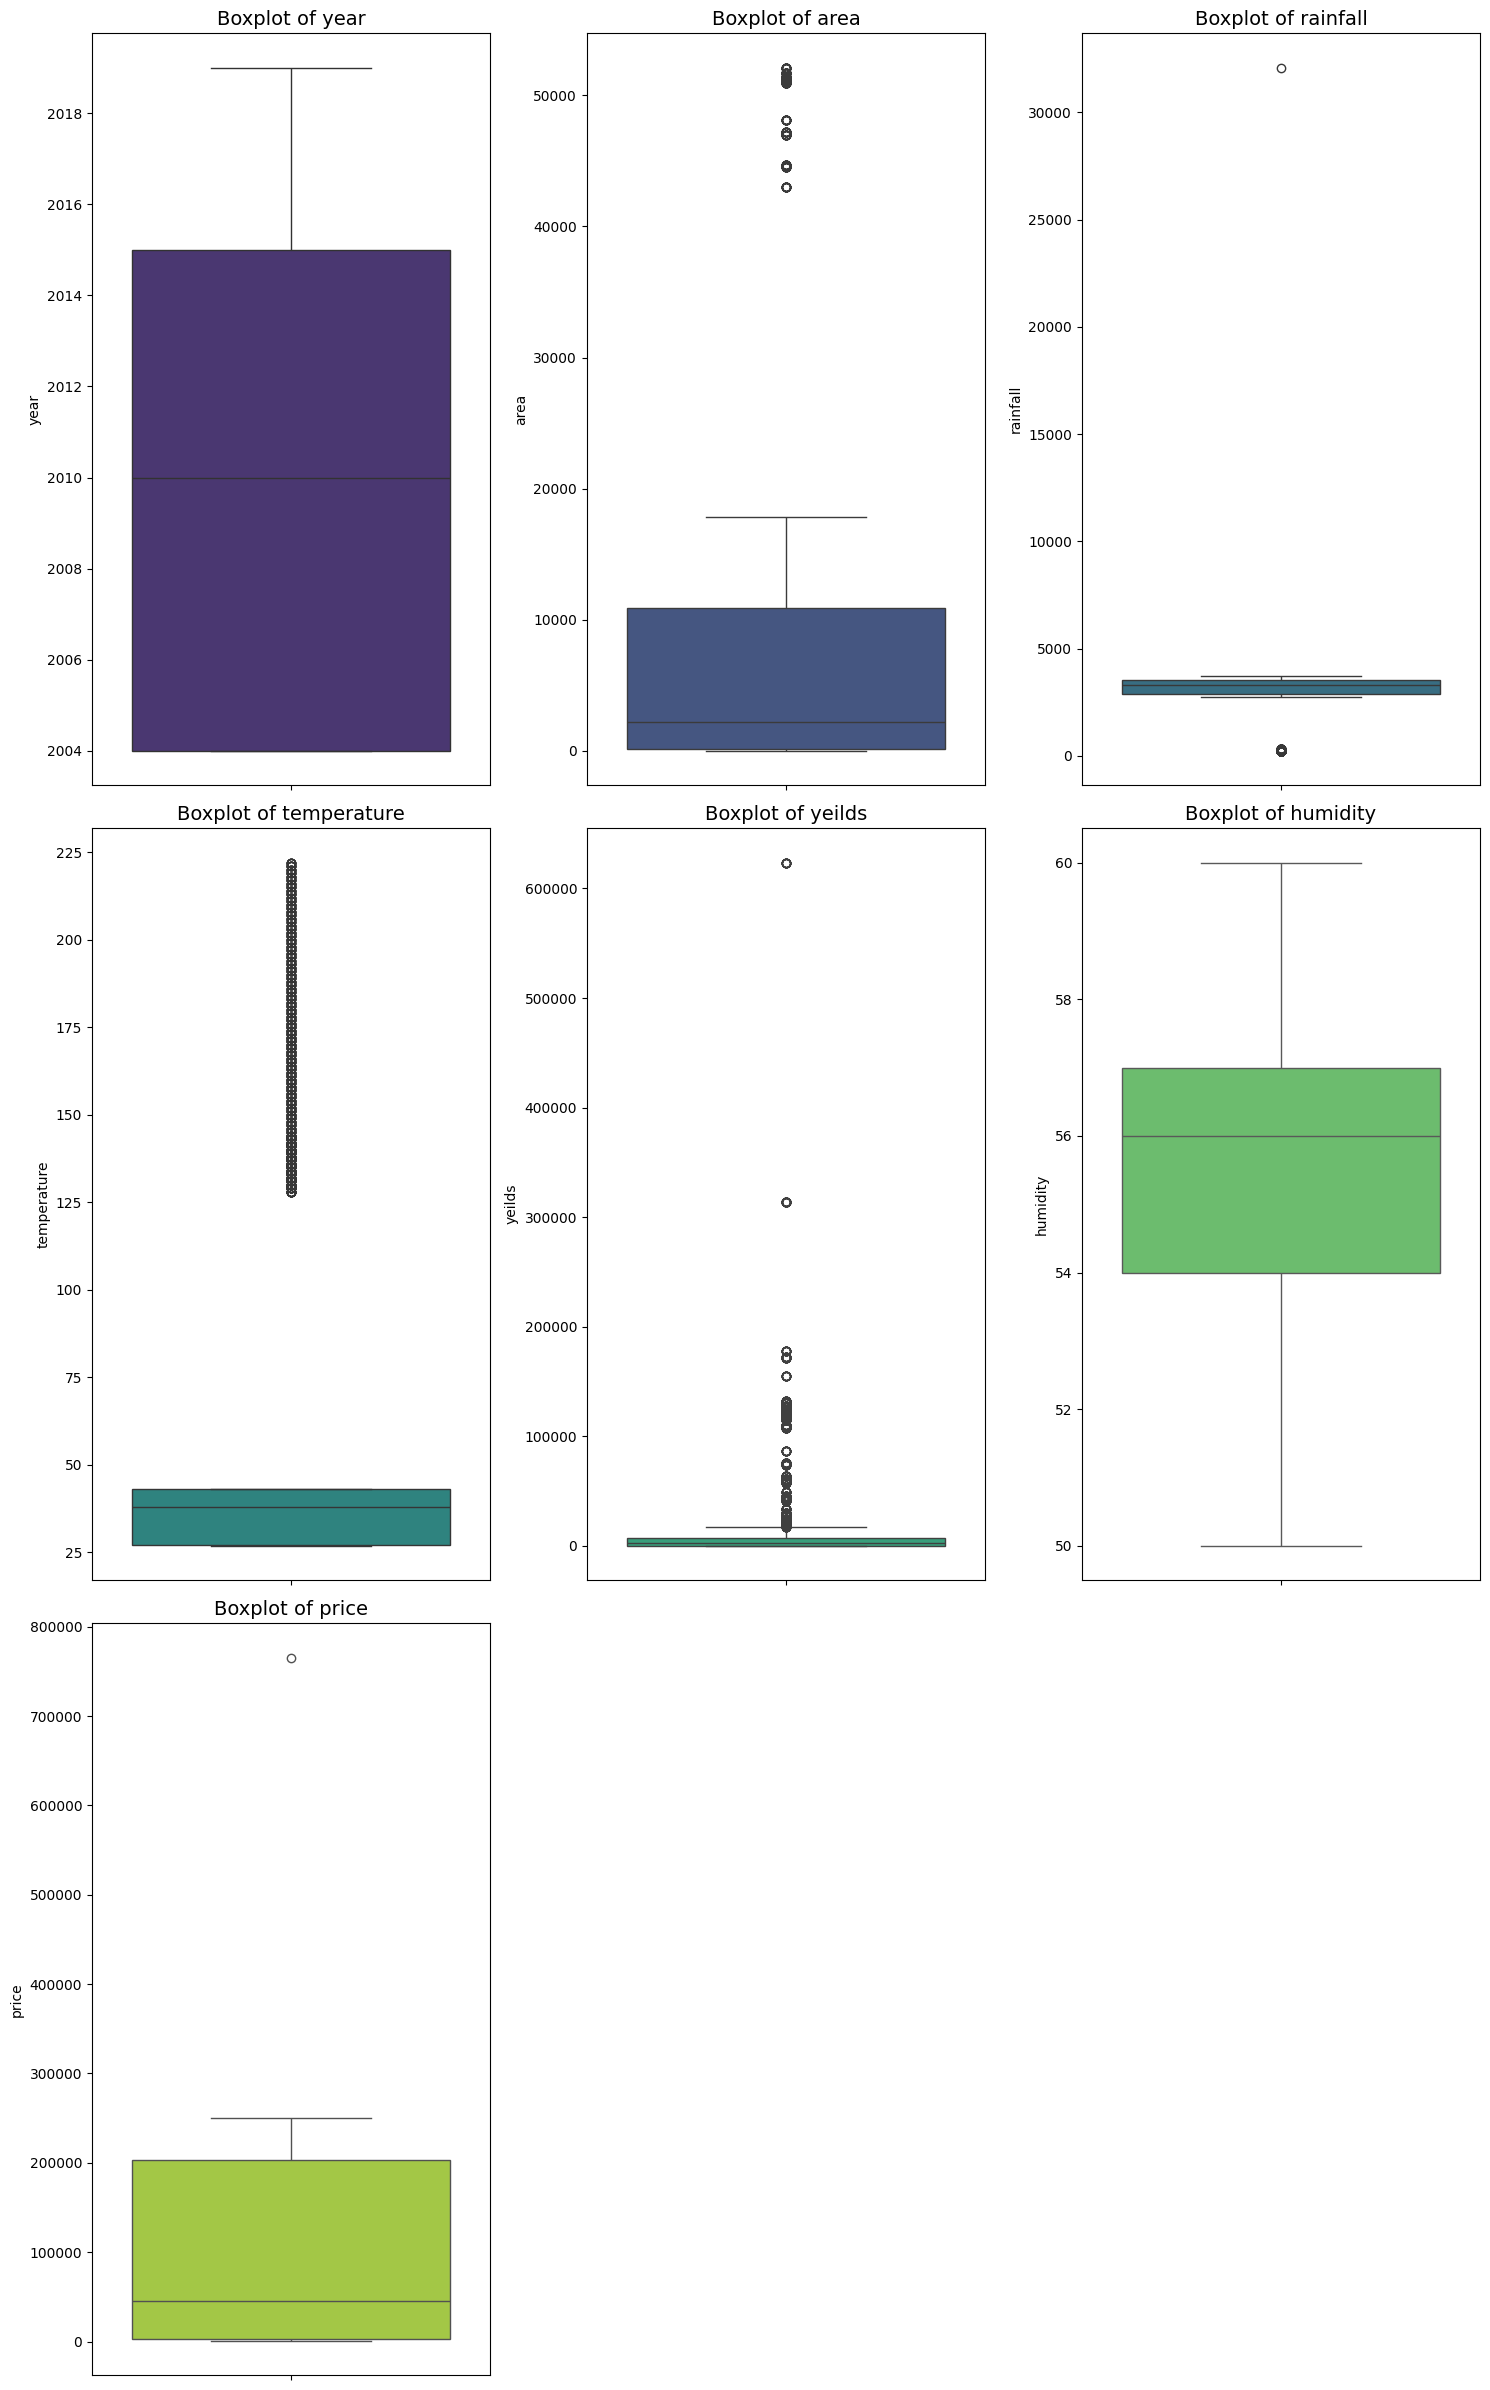

In [27]:
num_var = df.select_dtypes(include=['number']).columns

num_cols = 3
num_rows = math.ceil(len(num_var) / num_cols)

fig, ax = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 8 * num_rows))
ax = ax.flatten()

colors = sns.color_palette("viridis", len(num_var))

for i, col in enumerate(num_var):
    sns.boxplot(y=df[col], color=colors[i], ax=ax[i])
    ax[i].set_title(f'Boxplot of {col}', fontsize=14)

# I remove any unused axes (if the number of columns isn't a perfect multiple of 3)
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

# 🌟 Outlier Summary

# ✔️Year: No major outliers; data ranges from 2004 to 2018.
# ✔️ Area: Some extreme outliers above 40,000 hectares, while most values are below 20,000 hectares.
# ✔️ Rainfall: One very high outlier (30,000 mm), likely an error, and a minor outlier near 0 mm. Most values are within 2,000–5,000 mm.
# ✔️ Temperature: Extreme outliers above 125°C, peaking at 225°C (likely a data error). Most values are 25°C to 50°C.
# ✔️ Yields: Many outliers, some exceeding 600,000 kg. Could be rare high-yield cases or data issues. Needs further review.
# ✔️ Humidity: Stable, ranging 50% to 60%, with no extreme outliers.
# ✔️ Price: The extreme outlier (~780,000) is significantly higher than the rest, suggesting either a data entry error or a rare, exceptionally high-priced item.

# 📊🔧❗ Handling Outliers with Imputation

In [28]:
columns_to_check = ['year', 'area', 'rainfall', 'temperature', 'yeilds', 'humidity', 'price']

outlier_percentages = {}

for column_name in columns_to_check:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    
    percentage_outliers = (len(outliers) / len(df)) * 100
    
    outlier_percentages[column_name] = percentage_outliers
    
sorted_outliers = dict(sorted(outlier_percentages.items(), key=lambda item: item[1]))

for column, percentage in sorted_outliers.items():
    print(f"Percentage of outliers in {column}: {percentage:.2f}%")

Percentage of outliers in year: 0.00%
Percentage of outliers in humidity: 0.00%
Percentage of outliers in price: 0.03%
Percentage of outliers in area: 11.12%
Percentage of outliers in rainfall: 16.21%
Percentage of outliers in yeilds: 22.99%
Percentage of outliers in temperature: 23.31%


# 📉🔧 Imputing Outliers in Yeilds and Temperature Using the Winsorization Method

# Since yeilds and Temperature (22.99% and 23.31% outliers) have a high percentage of outliers, I will use the Winsorization method. I will cap the extreme values at a reasonable threshold (e.g., the 1st and 99th percentiles) to prevent the loss of valuable data while reducing the influence of extreme values.

In [29]:
print("1st and 99th percentiles for Yields:")
df['yeilds'].quantile([0.01, 0.99])

1st and 99th percentiles for Yields:


0.01         3.0
0.99    313547.0
Name: yeilds, dtype: float64

In [30]:
print("1st and 99th percentiles for Temperature:")
df['temperature'].quantile([0.01, 0.99])

1st and 99th percentiles for Temperature:


0.01     26.8
0.99    217.0
Name: temperature, dtype: float64

In [31]:
def winsorize_column(df, column_name):
    lower_limit = df[column_name].quantile(0.01)
    upper_limit = df[column_name].quantile(0.99)
    
    df.loc[:, column_name] = df[column_name].clip(lower=lower_limit, upper=upper_limit)
    
    return df

df = winsorize_column(df, 'yeilds')
df = winsorize_column(df, 'temperature')

df[['yeilds', 'temperature']].head()

,yeilds,temperature
0,2570.0,27.0
1,27170.0,27.0
2,114744.0,27.0
3,1402.0,27.0
4,23456.0,27.0


In [32]:
print("Updated statistics for yeilds:")
df['yeilds'].describe()

Updated statistics for yeilds:


count      3084.000000
mean      22456.444909
std       50256.143472
min           3.000000
25%         393.000000
50%        2783.000000
75%        7157.000000
max      313547.000000
Name: yeilds, dtype: float64

In [33]:
print("Updated statistics for Temperature:")
df['temperature'].describe()

Updated statistics for Temperature:


count    3084.000000
mean       64.073833
std        59.007191
min        26.800000
25%        27.000000
50%        38.000000
75%        43.000000
max       217.000000
Name: temperature, dtype: float64

# yeilds values like 2570.0, 27170.0, 114744.0, 1402.0, and 23456.0 seem reasonable and within the range of the 1st and 99th percentiles (3 to 313,547).

# Temperature values like 27.0 are within the capped range (from 26.8 to 217), so no extreme outliers remain.

# 📉🔧 Log Transformation for Imputing Outliers in Rainfall and Area

In [34]:
rainfall_skewness = df['rainfall'].skew()
area_skewness = df['area'].skew()

print(f"Skewness of Rainfall: {rainfall_skewness:.2f}")
print(f"Skewness of Area: {area_skewness:.2f}")

Skewness of Rainfall: 2.67
Skewness of Area: 2.05


# Rainfall and Area are right-skewed, with skewness values greater than 1, indicating long right tails. To reduce skewness and make the distributions more symmetrical, I applied the log transformation to handle the outliers.

In [35]:
df.loc[:, 'rainfall'] = np.log1p(df['rainfall'])
df.loc[:, 'area'] = np.log1p(df['area'])

rainfall_skewness_after = df['rainfall'].skew()
area_skewness_after = df['area'].skew()

print(f"Skewness of Rainfall after log transformation: {rainfall_skewness_after:.2f}")
print(f"Skewness of Area after log transformation: {area_skewness_after:.2f}")

Skewness of Rainfall after log transformation: -1.80
Skewness of Area after log transformation: -0.53


# The log transformation has indeed reduced the positive (right) skewness, and now both columns are left-skewed (negative skew), which indicates the data has become more symmetric. 
# Since the skewness is now closer to a normal distribution and the left skewness is slight, it is acceptable to leave the data as is for most analysis purposes.

# 📉🔧 Imputation isn't needed for Year, Humidity, and Price, as the outliers are minimal.

# 📊🔍 Checking Collinearity

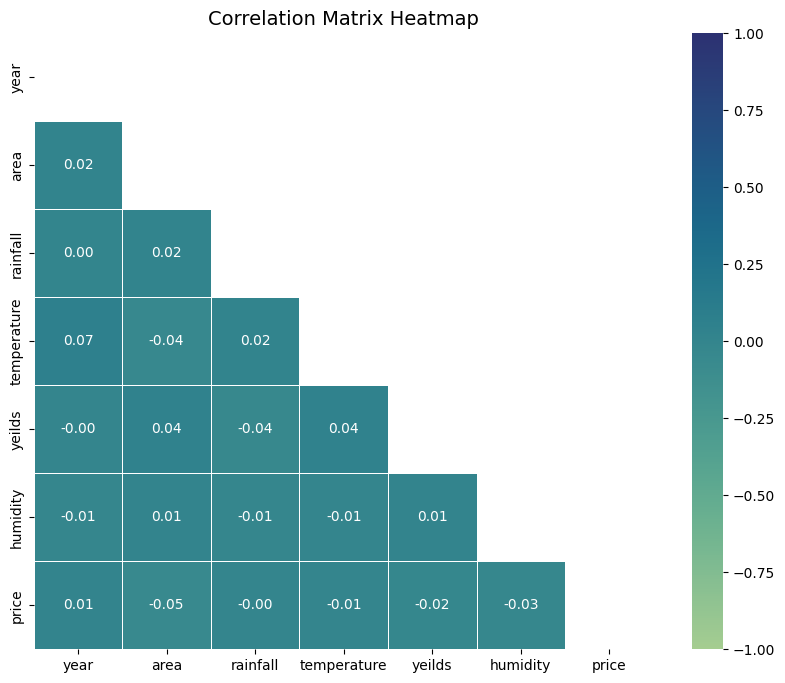

In [36]:
num_vars = df.select_dtypes(include=['number'])

corr_matrix = num_vars.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="crest", fmt=".2f", linewidths=0.6, vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap", fontsize=14)
plt.show()

# The "Correlation Matrix Heatmap" shows the relationships between Year, Area, Rainfall, Temperature, Yields, Humidity, and Price. All correlations are very weak (close to 0, ranging from -0.09 to 0.04), meaning these variables don’t strongly affect each other or yields. For example, Yields have a slight positive link with Area (0.04) and Temperature (0.04) but a small negative link with Rainfall (-0.03). The outcome suggests other factors, like soil or crop type, might better explain yields.

# ⭐ Finding the Season with the Highest Yield

In [37]:
df['season'].value_counts()

season
Rabi      1728
Zaid       757
Kharif     599
Name: count, dtype: int64

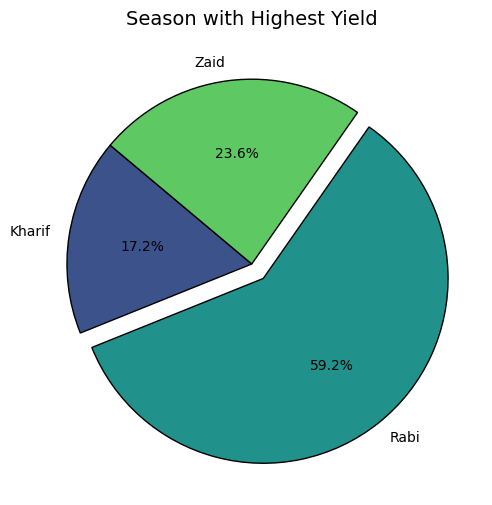

In [38]:

season_yield = df.groupby("season")["yeilds"].sum()

colors = sns.color_palette("viridis", len(season_yield))

explode = [0.1 if i == season_yield.max() else 0 for i in season_yield]

plt.figure(figsize=(8, 6))
plt.pie(season_yield, labels=season_yield.index, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=explode, wedgeprops={"edgecolor": "black"})

plt.title("Season with Highest Yield", fontsize=14)
plt.show()

# The pie chart "Season with Highest Yield" shows Rabi season with the highest crop yield at 59.2%, followed by Zaid at 23.9%, and Kharif at 16.9%. Rabi is the most productive season, while Kharif yields the least, suggesting better conditions for crops in Rabi and challenges in Kharif and Zaid.

# 🌾📈 Impact of Area, Rainfall, Temperature and Season on Crop Yield

# 1- Area vs. Yield 📏

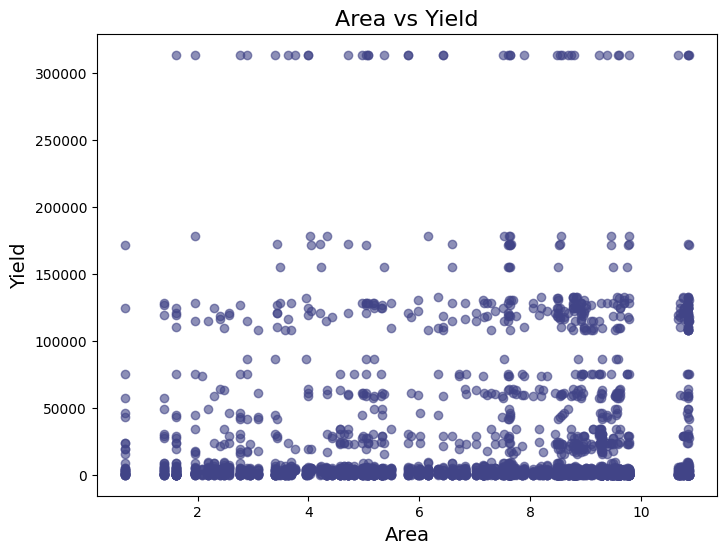

In [39]:
color = sns.color_palette("viridis", as_cmap=True)(0.2)   
x1, y1 = df['area'], df['yeilds']
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x1, y1, color=color, alpha=0.6)  
ax.set_xlabel('Area', fontsize=14)
ax.set_ylabel('Yield', fontsize=14)
ax.set_title('Area vs Yield', fontsize=16)
plt.show()

# The distribution of points suggests that as Area increases, Yield varies significantly. There are multiple horizontal clusters, indicating that Yield might be influenced by other factors beyond just Area. Some data points at the top indicate high yield even for smaller areas, possibly due to better soil quality, irrigation, or crop type.

# 2- Rainfall vs. Yield  🌧️🌱

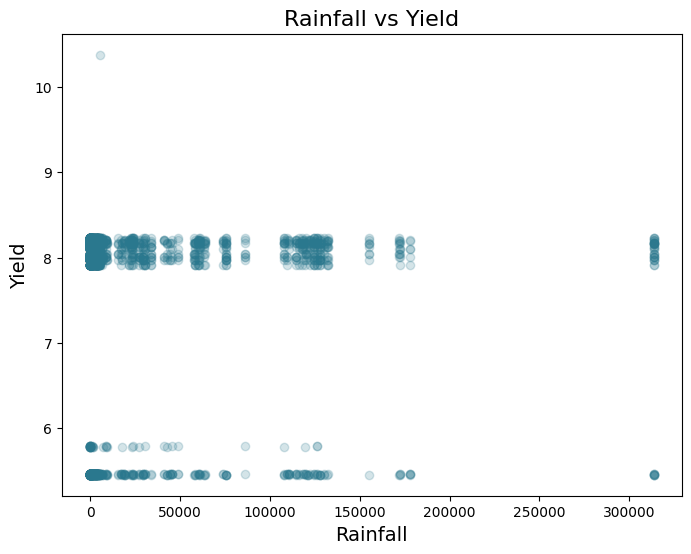

In [40]:
color = sns.color_palette("viridis", as_cmap=True)(0.4) 
x1, y1 = df['yeilds'], df['rainfall']
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x1, y1, color=color, alpha=0.2)
ax.set_xlabel('Rainfall', fontsize=14)
ax.set_ylabel('Yield', fontsize=14)
ax.set_title('Rainfall vs Yield', fontsize=16)
plt.show()

# The points appear grouped into clusters, meaning Rainfall values are limited to specific ranges. Yield seems to vary widely for the same Rainfall levels, indicating that Rainfall alone does not strongly determine Yield. Some extreme Yield values at specific Rainfall levels suggest the presence of outliers or the effect of additional influencing factors like irrigation.

# 3- Temperature vs. Yield 🌡️🌾

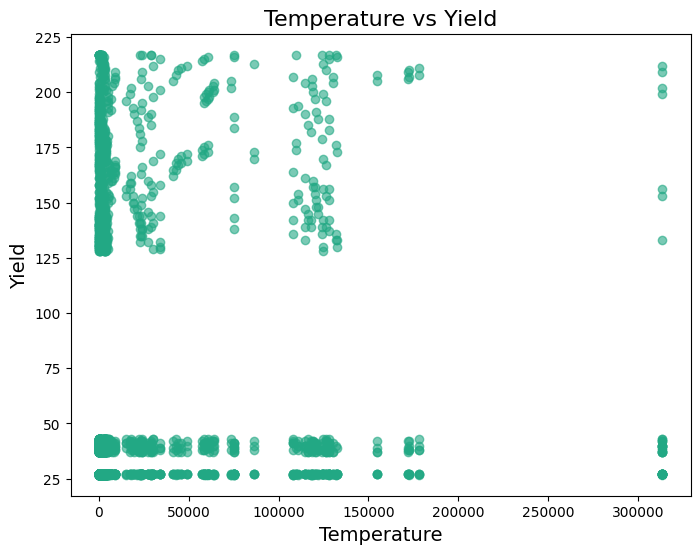

In [41]:
color = sns.color_palette("viridis", as_cmap=True)(0.6) 
x1, y1 = df['yeilds'], df['temperature']
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x1, y1, color=color, alpha=0.6)
ax.set_xlabel('Temperature', fontsize=14)
ax.set_ylabel('Yield', fontsize=14)
ax.set_title('Temperature vs Yield', fontsize=16)
plt.show()

# The spread of points shows that Yield is higher at moderate Temperature levels and lower at extreme ends. At lower Temperature values, Yield is more concentrated in specific ranges, while at higher temperatures, the spread increases. The clusters suggest that other factors like crop type, irrigation, or soil conditions may interact with Temperature to influence Yield.

# 4- Season vs Yield 🌿🌽

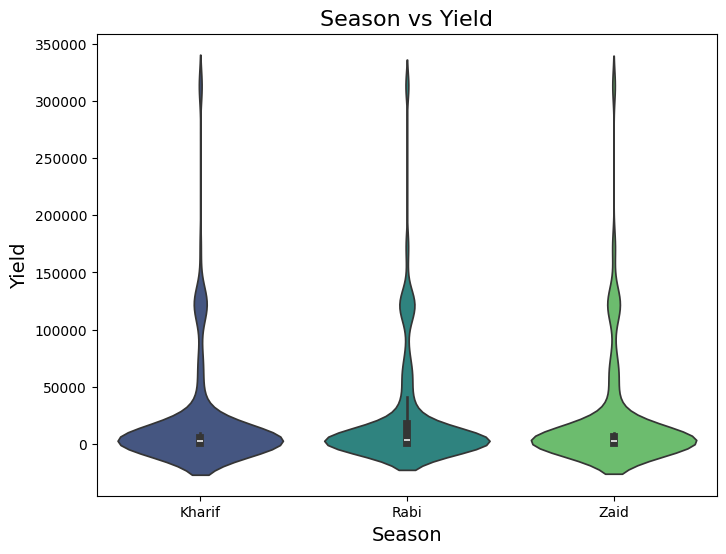

In [42]:
plt.figure(figsize=(8, 6))
sns.violinplot(
    x='season', 
    y='yeilds', 
    data=df, 
    hue='season', 
    palette='viridis', 
    legend=False
)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Yield', fontsize=14)
plt.title('Season vs Yield', fontsize=16)
plt.show()

# The chart shows that most yields are low in all seasons, with a few very high yield outliers (above 300,000). Additionally, yield patterns are similar for Kharif, Rabi, and Zaid, meaning the distribution doesn't vary much by season. The thick part of each shape indicates where most data is concentrated, below 50,000.

# 📊 Distribution of Yield (Target)

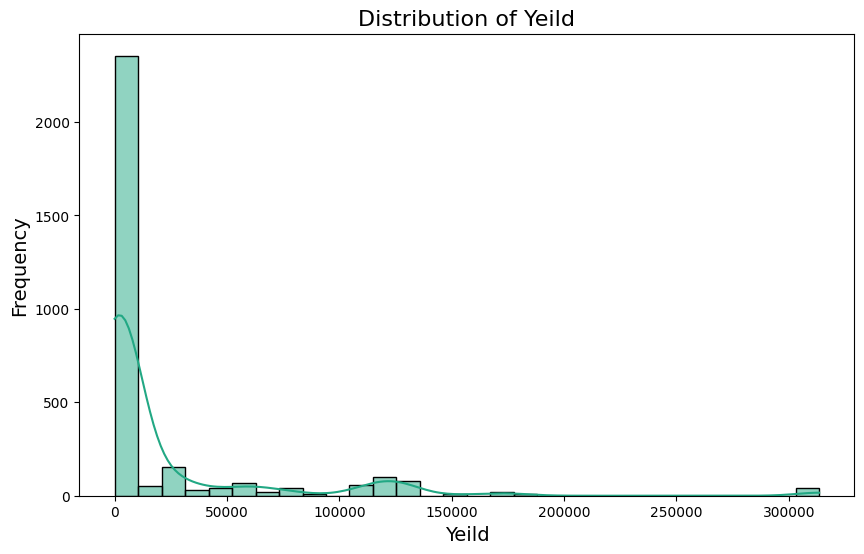

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df['yeilds'], kde=True, color=sns.color_palette("viridis", as_cmap=True)(0.6), bins=30)
plt.title('Distribution of Yeild', fontsize=16)
plt.xlabel('Yeild', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# The histogram 'Distribution of Yield' shows that most crop yields are low, clustering between 0 and 50,000 units, with a peak frequency near 0. A few rare high yields reach up to 600,000. This suggests generally low productivity with some exceptional harvests. The right skewness of the yield distribution indicates an imbalance in the data, where lower yields are more common, and higher yields are outliers.

# 🌱🌍 Crop and Soil Type Distribution

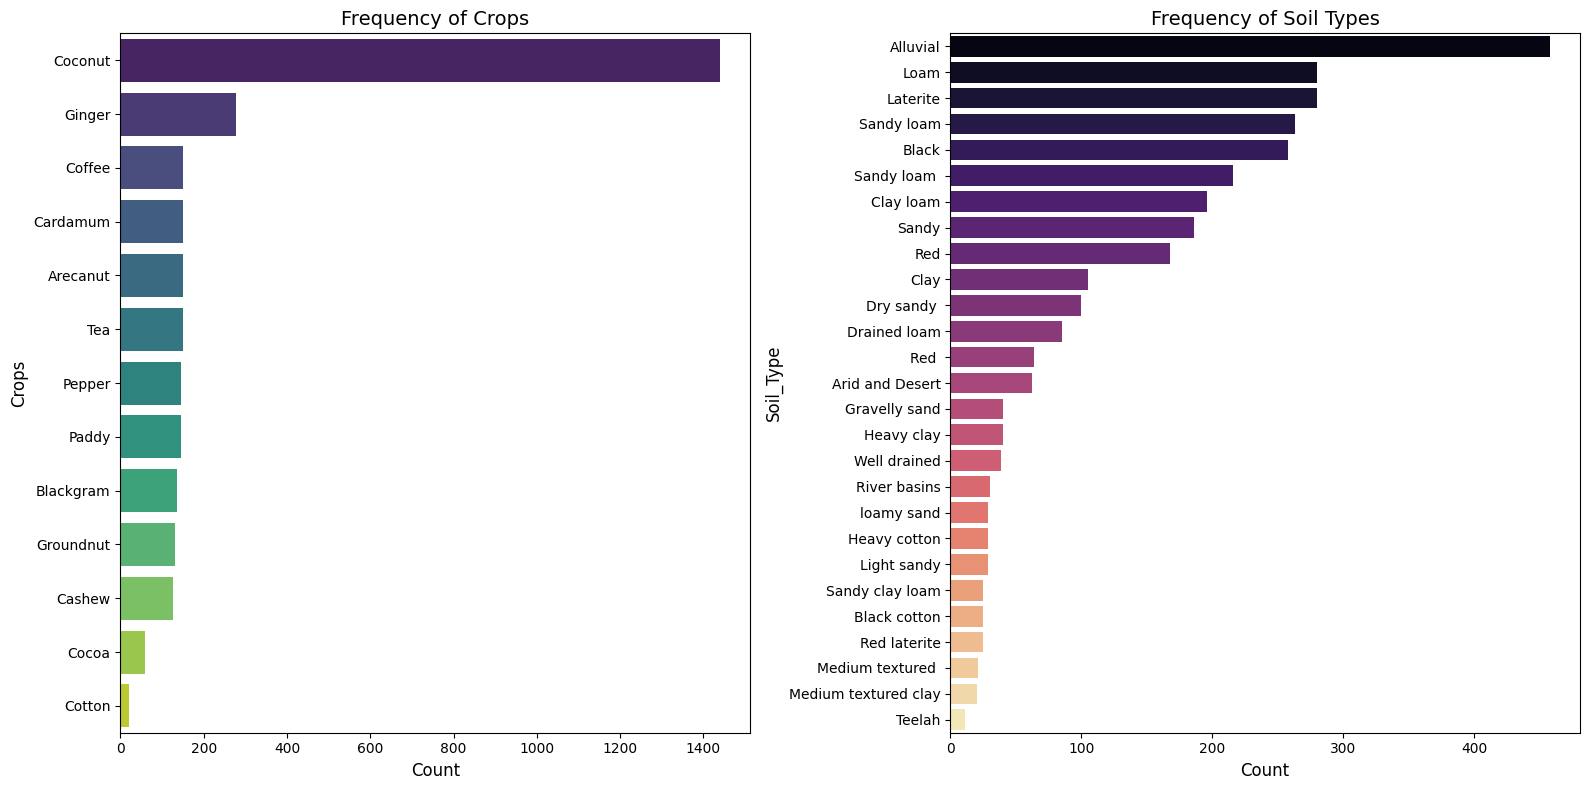

In [44]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
crop_counts = df['crops'].value_counts()
sns.barplot(x=crop_counts.values, y=crop_counts.index, hue=crop_counts.index, palette='viridis', legend=False)
plt.title('Frequency of Crops', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Crops', fontsize=12)

plt.subplot(1, 2, 2)
soil_counts = df['soil_type'].value_counts()
sns.barplot(x=soil_counts.values, y=soil_counts.index, hue=soil_counts.index, palette='magma', legend=False)
plt.title('Frequency of Soil Types', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Soil_Type', fontsize=12)

plt.tight_layout()
plt.show()

# The charts show crop and soil type frequencies. Coconut is the most common crop (around 1400 count), followed by Ginger, Coffee, and Cardamom (200-400). Cotton and Cocoa are rare (under 150). Alluvial soil is the most frequent (around 500 count), followed by Loam and Laterite. The outcome suggests Coconut thrives in the dominant Alluvial and Loam soils, while rare crops like Cotton may struggle due to less suitable soils like Sandy or Arid types.

# Average Crop Yields per Year

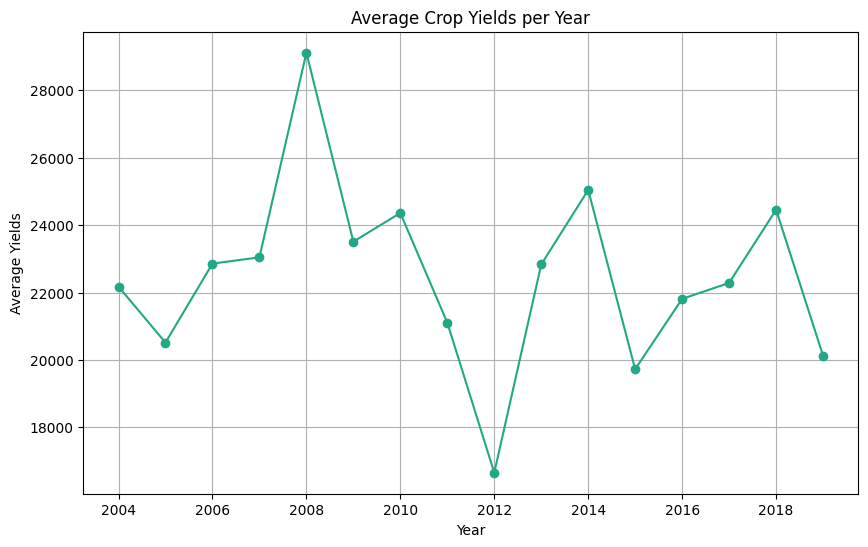

In [45]:
yearly_avg_yields = df.groupby('year')['yeilds'].mean().reset_index()

color = sns.color_palette("viridis", as_cmap=True)(0.6)  

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_yields['year'], yearly_avg_yields['yeilds'], marker='o', color=color)
plt.title('Average Crop Yields per Year')
plt.xlabel('Year')
plt.ylabel('Average Yields')
plt.grid(True)
plt.show()

# The chart "Average Crop Yields per Year" (2004-2019) shows fluctuating crop yields with no clear long-term growth trend.

# Highest yields: Peaks occurred around 2008, 2014, and 2018, reaching approximately 28,000.

# Lowest yield: The sharpest decline happened around 2012.

# Fluctuations: Yields change unpredictably, with peaks every 4-5 years and significant drops starting in 2004, followed by 2008, 2014, and 2018.

# Insights: The inconsistent productivity suggests external influences like weather, soil conditions, or farming factors, emphasizing the need for strategies to stabilize yields.

# 🌾📊 Exploratory Data Analysis of Crop Yields: Insights and Key Findings 

# The dataset provides valuable insights into agricultural yields across different seasons, locations, and environmental conditions in Karnataka, specifically Mangalore. Key factors such as rainfall, temperature, soil type, and irrigation methods influence crop growth and yield. By analyzing these variables, we gain a deeper understanding of the relationship between environmental factors and crop productivity. The yield values cover a broad range, reflecting fluctuations based on seasonal changes and varying conditions.

# Upon analyzing the distribution of yields, we observe a slight skew, with certain seasons showing higher concentrations of yield in specific ranges. This suggests that factors like rainfall and temperature may have a stronger impact on yield than others. Optimizing these environmental conditions and farming practices could lead to higher yields, helping farmers make informed decisions to improve crop production and ensure better outcomes.


# 😊💐 Thank You!